## Basemodel

Target:
+ life_ladder  

Features:
+ log_gdp_per_capita

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
model_name = 'basemodel'

function section

In [3]:
def adjusted_r_squared(r_squared, X):
    adjusted_r2 = 1 - ((1 - r_squared) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [4]:
df = pd.read_csv("../data/life_ladder_2005_2022_no1_gdp_sosupp.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_name        2166 non-null   object 
 1   year                2166 non-null   int64  
 2   life_ladder         2166 non-null   float64
 3   log_gdp_per_capita  2166 non-null   float64
 4   social_support      2166 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 84.7+ KB


Define features and Target:

In [6]:
features = df.columns.tolist()
features.remove('country_name')
features.remove('year')
features.remove('life_ladder')
features.remove('social_support') # nur hier, spaeter nicht mehr!!

X = df[features]
y = df['life_ladder']

In [7]:
X.columns

Index(['log_gdp_per_capita'], dtype='object')

In [8]:
print(X.shape, y.shape)

(2166, 1) (2166,)


Train-Test-Split:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1516, 1) (650, 1) (1516,) (650,)


Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

KNN Model with variable number of neighbors and variable distance metrics

In [41]:
knn = KNeighborsRegressor(n_neighbors=25, p=1)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = r2_score(y_test, y_pred_dec_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = r2_score(y_train, y_pred_dec_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)

train_rmse  0.634
train_r2  0.68
test_rmse  0.634
test_r2  0.681


In [79]:
df_4_plot = pd.concat([X_test, y_test], axis=1)
df_4_plot.reset_index(inplace=True, drop=True) 
df_4_plot

,log_gdp_per_capita,life_ladder
0,8.036,5.104
1,10.692,7.488
2,10.043,5.961
3,7.423,3.466
4,9.539,4.887
...,...,...
645,9.222,5.043
646,8.369,4.476
647,8.499,4.448
648,9.940,5.514


In [80]:
y_pred_series = pd.DataFrame(y_pred_test)
y_pred_series.rename(columns={0:'prediction'}, inplace=True)

In [81]:
df_4_plot = pd.concat([df_4_plot, y_pred_series], axis=1)
df_4_plot

,log_gdp_per_capita,life_ladder,prediction
0,8.036,5.104,4.45592
1,10.692,7.488,6.72992
2,10.043,5.961,6.05344
3,7.423,3.466,3.94772
4,9.539,4.887,5.09936
...,...,...,...
645,9.222,5.043,5.25468
646,8.369,4.476,4.76208
647,8.499,4.448,4.92472
648,9.940,5.514,6.09116


<Axes: xlabel='life_ladder', ylabel='prediction'>

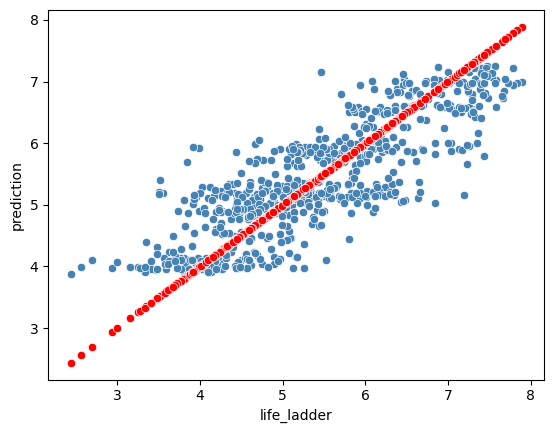

In [86]:
sns.scatterplot(data=df_4_plot.sort_values(by='life_ladder'),
                x=df_4_plot.life_ladder,
                y=df_4_plot.prediction, color='steelblue')
sns.scatterplot(data=df_4_plot.sort_values(by='life_ladder'),
                x=df_4_plot.life_ladder,
                y=df_4_plot.life_ladder, color='red')
#sns.pointplot(y=y_pred_dec_test, color='red')
#sns('log_gdp_per_capita')
#plt.ylabel('life_ladder');